In [1]:
img_name = 'groups.jpg'
import matplotlib.pyplot as plt
img = plt.imread(img_name)
img.shape

(506, 900, 3)

In [2]:
# 準備事項
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np, ast
from skimage import data
from skimage.feature import Cascade
from matplotlib import patches

def show_image(image, title='Image', cmap_type='gray', interpolation=None):
    plt.imshow(image, cmap=cmap_type)    
    plt.title(title)
    plt.axis('off')
    plt.show()
    

def crop_face(result, detected, title="Face detected"):
    for d in detected:
        print(d)
        rostro= result[d['r']:d['r']+d['width'], d['c']:d['c']+d['height']]
    
        plt.figure(figsize=(2, 2))
        plt.imshow(rostro)    
        plt.title(title)
        plt.axis('off')
        plt.show()
        
def show_detected_face(result, detected, title="Face image"):
    plt.figure()
    plt.imshow(result)
    img_desc = plt.gca()
    plt.set_cmap('gray')
    plt.title(title)
    plt.axis('off')

    for patch in detected:
        
        img_desc.add_patch(
            patches.Rectangle(
                (patch['c'], patch['r']),
                 patch['width'],
                 patch['height'],
                 fill=False,
                 color='r',
                 linewidth=2)
        )
    #crop_face(result, detected)
    plt.show()    
    
# 取出臉的四方位置
def getFaceRectangle(d):
    ''' Extracts the face from the image using the coordinates of the detected image '''
    # X and Y starting points of the face rectangle
    x, y  = d['r'], d['c']
    
    # The width and height of the face rectangle
    width, height = d['r'] + d['width'],  d['c'] + d['height']
    
    # Extract the detected face
    face= group_image[ x:width, y:height]
    return face   

# 進行模糊化 
def mergeBlurryFace(original, gaussian_image):
     # X and Y starting points of the face rectangle
    x, y  = d['r'], d['c']
    # The width and height of the face rectangle
    width, height = d['r'] + d['width'],  d['c'] + d['height']
    
    original[ x:width, y:height] =  gaussian_image
    return original 

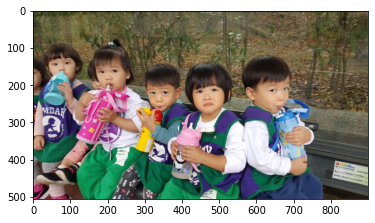

(506, 900, 3)

In [3]:
group = plt.imread(img_name)
group_image =  group.copy()   
plt.imshow(group_image)    
plt.show()
group_image.shape

In [12]:
from skimage.filters import gaussian

# Load the trained file from data
trained_file = data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade
detector = Cascade(trained_file)

# Detect the faces
detected = detector.detect_multi_scale(img=group_image, 
                                       scale_factor=1.2,
                                       step_ratio=1.0,
                                       min_size=(10, 10),
                                       max_size=(280, 280)) # <--------這裡是一個很重要參數

for d in detected:
    print(d)

{'r': 121, 'c': 162, 'width': 84, 'height': 84}
{'r': 195, 'c': 317, 'width': 62, 'height': 62}
{'r': 187, 'c': 428, 'width': 90, 'height': 90}


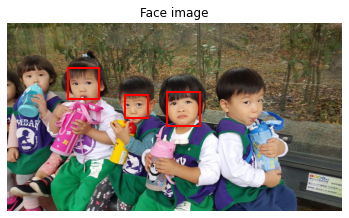

In [13]:
show_detected_face(group_image, detected, title="Face image")

In [14]:
group_image.min(), group_image.max()

(0, 255)

In [27]:
# For each detected face
from skimage import segmentation
from skimage.color import label2rgb

for d in detected:  
    # Obtain the face rectangle from detected coordinates
    face = getFaceRectangle(d)
    
    # Apply segmentation
    segments = segmentation.slic(face, start_label = 1, n_segments=3)
    modified_face = label2rgb(label=segments, 
                              image=face, 
                              kind='avg', bg_label=None).astype('uint8')

    # Apply gaussian filter to extracted face
    # modified_face = np.clip(gaussian(face, multichannel=True, sigma = 10) * 255,
    #                        a_min = 0, 
    #                        a_max = 255)
    print('After blurred', modified_face.min(), modified_face.max()) # root cause 為何黑臉
    # Merge this blurry face to our final image and show it
    resulting_image = mergeBlurryFace(group_image, modified_face) 

After blurred 50 188
After blurred 85 193
After blurred 73 190


In [ ]:
# 上述怎樣強化 可以看到模糊化

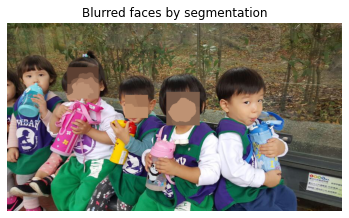

In [28]:
show_image(resulting_image, "Blurred faces by segmentation")